<a href="https://colab.research.google.com/github/lakshitgosain/Transformers-for-NLP/blob/main/TF_I01_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Text processing Review

Steps:
1. Tokenizing- String split, split words,+ punctuations, characters, subwords
2. Map tokens to integers . E.g I like cats= [420, 650, 103]
3. Padding/truncation (to process batches of different length)


Tokenization
* strtok function - splits the sting by a deliminator
* It's but now more than just splitting by a Deliminator. We need more steps . Eg - Lemmatization, stemming, stopwords removal

Character-level Tokenization
- BOB likes cats -> B,O,B,"",l,i,k,e,s...
- Such are used for use cases like : language translation, name generation.

Subword Token
It is customary to use subword tokeniztion in Transformers.
* sometimes we split words into multiple tokens.
* consider- run, running, etc.
* with word-level tokenization, these would be treated independently.
* Not ideal , because we know there's some relationship.
* Better with 2 tokens- run +suffix





##Subword tokenization and trnasformers

* Although we ofter use subword tokeniztion with transformers, they are separate concepts
* If you are using RNNs, we can also use subword tokenization with RNN.

Subword tokenizatio- How do we choose subword boundaries

We can apply algos to tokenize texts



###NOTE: Different models use different tokeization techniques

##Mapping tokens to integers

We represent a mapping with dict

We also use the reverse-mapping

## Padding

Every doc has a different length which is not good for processing in batchs..so we need a constant size.

We cannot assume that it's always 0

** We do not want to pad everything to be as long as the longest document in the whole dataset( There can be outliers
* EG- Most if the docs have 10k words but one doc had 100k words/tokens
* We should pad dynamically, relative to the current batch
* It's ok for different batches to have different lengths.
* Transformers cannot be recurrent, so they cannot handle sequences of different lengths


## Truncation

Opposite of padding.
* We want our docs to be shorter.
There is a limit of characters for transformers

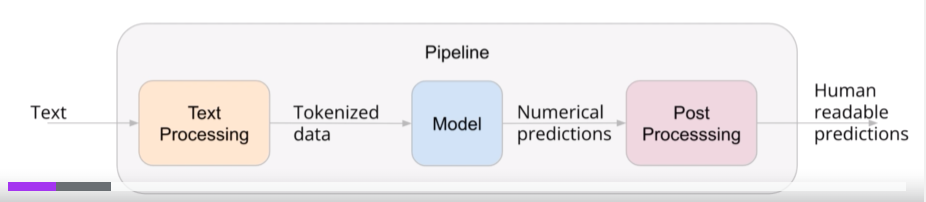

##Tokenizer and Models

The tokenizer doesn't just do tokenization , but all text preprocessing steps
There are universal as well as odel specific tokenizers
* Universal interface to BertTokenizer, DistillBertTokenizer, GPT2Tokenizer

* Hugging Face model is a wrap around TF/Pytorch model with a feew added tricks

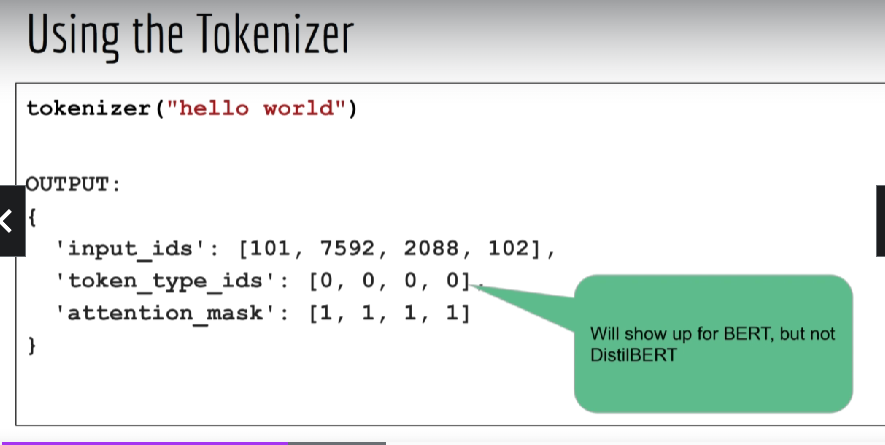

Pytorch doesn't take lists as inputs , which if the output of tokenizers.
We need to specify the return_tensors='pt'/'tf'/'np'

padding and truncation needs to be added if we are converting to tensors

##Using the model

There exists different automodels for different models


We use the model_inputs dict with ** infront.-> This converts the veriable/dict to named arguments

## Model Outputs
We will get a tensorflow tensor, with n*k Output

The outputs are logits, (Values before applying logits)

# Code

In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer

In [3]:
checkpoint='bert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [4]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [5]:
tokenizer("Hello World")

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [6]:
tokens=tokenizer.tokenize("Hello World")

In [7]:
tokens

['hello', 'world']

In [8]:
ids=tokenizer.convert_tokens_to_ids(tokens)

In [9]:
ids

[7592, 2088]

In [10]:
tokenizer.convert_ids_to_tokens(ids)

['hello', 'world']

In [11]:
tokenizer.decode(ids)

'hello world'

In [12]:
ids=tokenizer.encode("Hello World")

In [13]:
ids

[101, 7592, 2088, 102]

In [14]:
tokenizer.convert_ids_to_tokens(ids)

['[CLS]', 'hello', 'world', '[SEP]']

In [15]:
tokenizer.decode(ids)

'[CLS] hello world [SEP]'

In [16]:
model_inputs=tokenizer("Hello World")

In [17]:
model_inputs

{'input_ids': [101, 7592, 2088, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [18]:
data=['I like cats.',
      "Do you like cats too?"]

In [19]:
tokenizer(data)

{'input_ids': [[101, 1045, 2066, 8870, 1012, 102], [101, 2079, 2017, 2066, 8870, 2205, 1029, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}

In [22]:
from transformers import TFAutoModelForSequenceClassification

In [23]:
model=TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
outputs=model(**model_inputs)

ValueError: ignored

In [25]:
model_inputs=tokenizer("Hello World", return_tensors='tf')
model_inputs

{'input_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[ 101, 7592, 2088,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 1]], dtype=int32)>}

In [28]:
outputs

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.29231477,  0.09504312]], dtype=float32)>, hidden_states=None, attentions=None)

In [29]:
#The model assumes by default that we need a binary classifier

In [30]:
model=TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
outputs=model(**model_inputs)

In [32]:
outputs

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.19349289, -0.0282242 ,  0.20094302]], dtype=float32)>, hidden_states=None, attentions=None)

In [33]:
outputs.logits

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.19349289, -0.0282242 ,  0.20094302]], dtype=float32)>

In [34]:
outputs[0]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.19349289, -0.0282242 ,  0.20094302]], dtype=float32)>

In [35]:
outputs['logits']

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.19349289, -0.0282242 ,  0.20094302]], dtype=float32)>

In [37]:
outputs.logits.numpy()

array([[ 0.19349289, -0.0282242 ,  0.20094302]], dtype=float32)

In [38]:
data=['I like cats.',
      "Do you like cats too?"]

In [41]:
model_inputs=tokenizer(data, return_tensors='tf', padding=True, truncation=True)

In [42]:
model_inputs

{'input_ids': <tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[ 101, 1045, 2066, 8870, 1012,  102,    0,    0],
       [ 101, 2079, 2017, 2066, 8870, 2205, 1029,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [43]:
outputs=model(**model_inputs)

In [44]:
outputs

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.25609136, -0.13511847,  0.11226366],
       [ 0.27081063, -0.14832953,  0.11403048]], dtype=float32)>, hidden_states=None, attentions=None)

In [45]:
outputs.logits

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.25609136, -0.13511847,  0.11226366],
       [ 0.27081063, -0.14832953,  0.11403048]], dtype=float32)>